In [10]:
import sklearn as sk
import scipy as sp
import mne
import numpy as np

In [11]:
#Load a mat file and corresponding metadata
example_mat = sp.io.loadmat('data/20110706/LFP_ch1.mat')
example_time_info = sp.io.loadmat('data/20110706/Movie_start_time.mat')
example_task_info = sp.io.loadmat('data/20110706/Task_info.mat')

example_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Thu Jul  7 19:42:14 2011',
 '__version__': '1.0',
 '__globals__': [],
 'LFP': array([[-136, -123, -122, ...,  -38,  -20,   -5]], dtype=int16)}

In [ ]:
#given a directory, load the LFP files in that directory as channels
data = []
directory = "20100708"

for i in range(128):
    file_num = i + 1
    file_name = "data/" + directory + "/" + "LFP_ch" + str(file_num) + ".mat"
    mat = sp.io.loadmat(file_name)
    data.append(mat["LFP"][0])


In [15]:
#given a directory, load the ECoG files in that directory as channels
data = []
directory = "20100615S1_EMT_K2_YasuoNagasaka-ZenasChao_mat_ECoG128-Event3-Eye9"

for i in range(128):
    file_num = i + 1
    file_name = "data/" + directory + "/" + "ECoG_ch" + str(file_num) + ".mat"
    key_name = "ECoGData_ch" + str(file_num)
    mat = sp.io.loadmat(file_name)
    data.append(mat[key_name][0])


In [16]:
#load a mat file into mne
'''
we should be able to directly load a mat file with something like this, but I couldn't get it to work
    example_eeg = mne.io.read_raw_fieldtrip('data/20110706/LFP_ch1.mat', info=None, data_name='LFP')
instead I used this tutorial
https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html
'''

#create info
n_channels = 128
sampling_freq = 1000
info = mne.create_info(n_channels, sfreq=sampling_freq)

#load the data from the scipy loaded mat:
#data would be a 2d np array where each row is loaded from one of the mat files as above
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=128, n_times=2166833
    Range : 0 ... 2166832 =      0.000 ...  2166.832 secs
Ready.


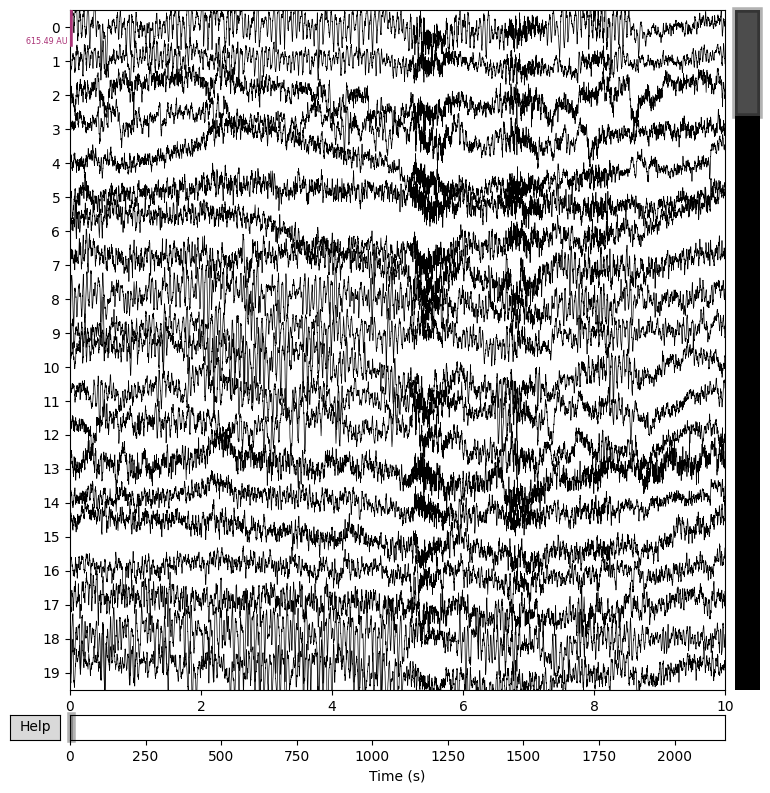

Channels marked as bad:
none
Attempting to create new mne-python configuration file:
/Users/iand/.mne/mne-python.json
Channels marked as bad:
none


In [17]:
# %matplotlib inline
# %matplotlib tk

raw.plot()